# Upper Confidence Bound (UCb) Algorithm
# [Reinforcement Learning]

##### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [3]:
file_path='C20_UpperConfidenceBound_Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(file_path)
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


#### Implementing UCB

In [21]:
import math
N=1000
d=10
ads_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_ub=0
    for i in range(0,d):
        if number_of_selection[i]>0:
            average_reward=sum_of_rewards[i]/number_of_selection[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selection[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound>max_ub):
            max_ub=upper_bound
            ad=i
    ads_selected.append(ad)
    number_of_selection[ad] +=1
    reward=dataset.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_reward+=reward

#### Visualising the results

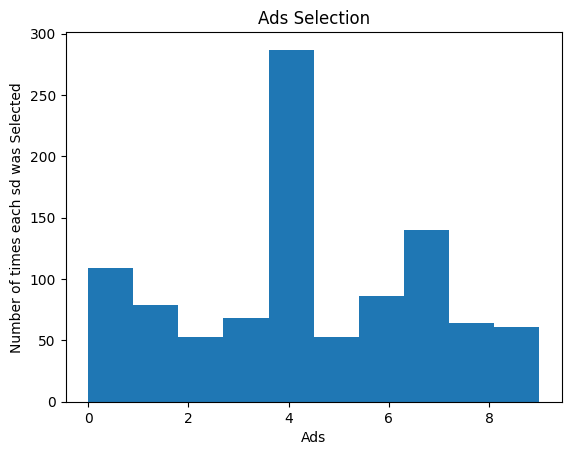

In [22]:
plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each sd was Selected')
plt.show()